## **Task 8 - Handwritten Digit Recognition with Neural Network.**

**Name: Prateek Bajpai**

**Class: Data Science & Big Data Analytics**

## **Importing Libraries.**

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from keras import layers, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


## **Loading Dataset.**

In [19]:
from keras.datasets import mnist

In [2]:
# Load MINST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## **Data Preprocessing.**

In [3]:
# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
print(x_train[:5])

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [5]:
print(y_test[:5])

[7 2 1 0 4]


In [6]:
# Printing the shapes of the loaded data
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


## **Data Visualization.**

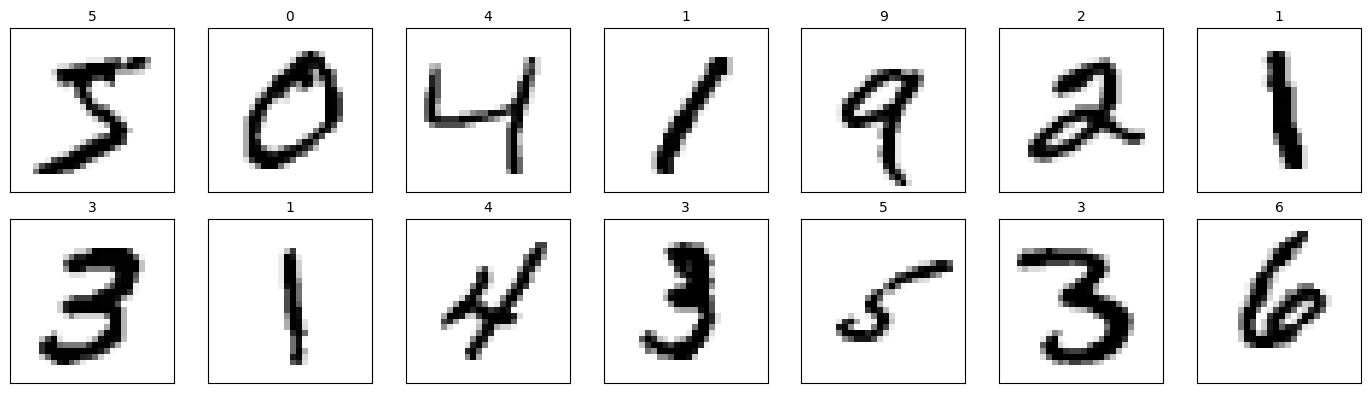

In [7]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plt.figure(figsize=(14, 4))
for i in range(14):
    plt.subplot(2, 7, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.title(class_names[y_train[i]], fontsize=10)
plt.tight_layout()
plt.show()

## **Model Building.**

In [9]:
# Build the neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Train the model
nn_model = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 22s 13ms/step - loss: 0.2757 - accuracy: 0.9188 - val_loss: 0.1652 - val_accuracy: 0.9501
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1152 - accuracy: 0.9652 - val_loss: 0.1045 - val_accuracy: 0.9678
Epoch 3/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0775 - accuracy: 0.9762 - val_loss: 0.0961 - val_accuracy: 0.9726
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0606 - accuracy: 0.9802 - val_loss: 0.0950 - val_accuracy: 0.9740
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0461 - accuracy: 0.9851 - val_loss: 0.0961 - val_accuracy: 0.9721


## **Model Evaluation.**  

In [13]:
# Evaluate the model
results = model.evaluate(x_test, y_test)

# Unpack the results
test_loss = results[0]
test_accuracy = results[1]
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0932 - accuracy: 0.9733
Test Accuracy: 0.9732999801635742
Test Loss: 0.09315419942140579


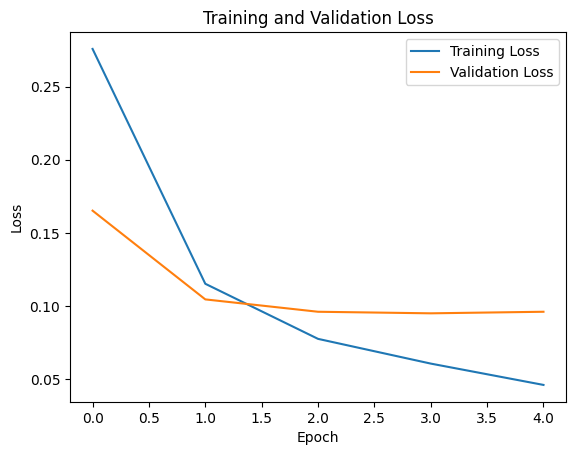

In [14]:
# Plot training and validation loss
plt.plot(nn_model.history['loss'], label='Training Loss')
plt.plot(nn_model.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

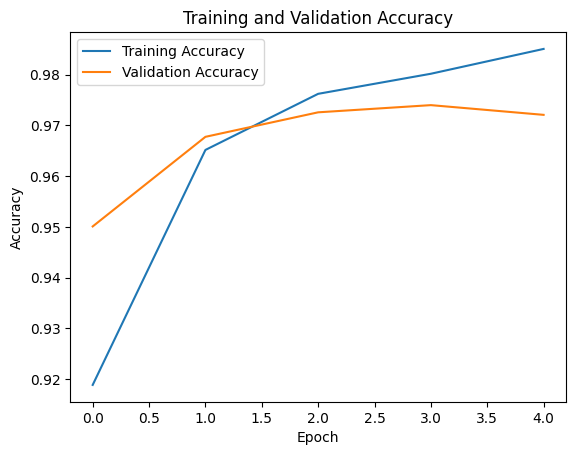

In [15]:
# Plot training and validation accuracy
plt.plot(nn_model.history['accuracy'], label='Training Accuracy')
plt.plot(nn_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)#ratio of correctly classified samples to the total number of samples in the dataset.
print("Precision:", precision)#proportion of true positive predictions out of all positive predictions
print("Recall:", recall)#proportion of true positive predictions out of all actual positive instances
print("F1-score:", f1)#harmonic mean of precison and recall

313/313 [==============================] - 1s 2ms/step
Accuracy: 0.9733
Precision: 0.9736997450068778
Recall: 0.9733
F1-score: 0.9733386026915416


Confusion Matrix:
[[ 968    1    1    1    1    5    1    1    1    0]
 [   0 1121    3    1    0    2    2    2    4    0]
 [   4    0 1006    6    2    1    1    4    8    0]
 [   0    0    5  981    0   12    0    3    4    5]
 [   2    0    4    0  928    1    3    3    0   41]
 [   2    0    0    2    0  882    2    0    1    3]
 [   4    4    1    0    6   18  923    0    2    0]
 [   1    3    9    7    0    0    0  993    3   12]
 [   2    0    1    6    3   10    0    4  943    5]
 [   4    2    0    4    3    5    0    3    0  988]]


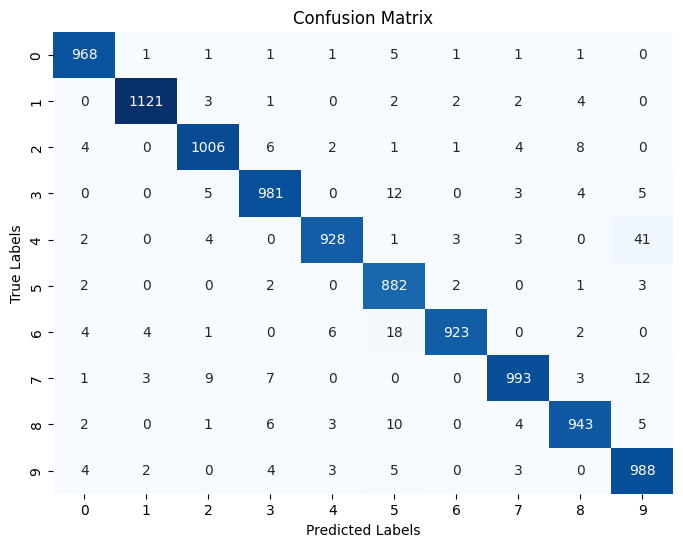

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

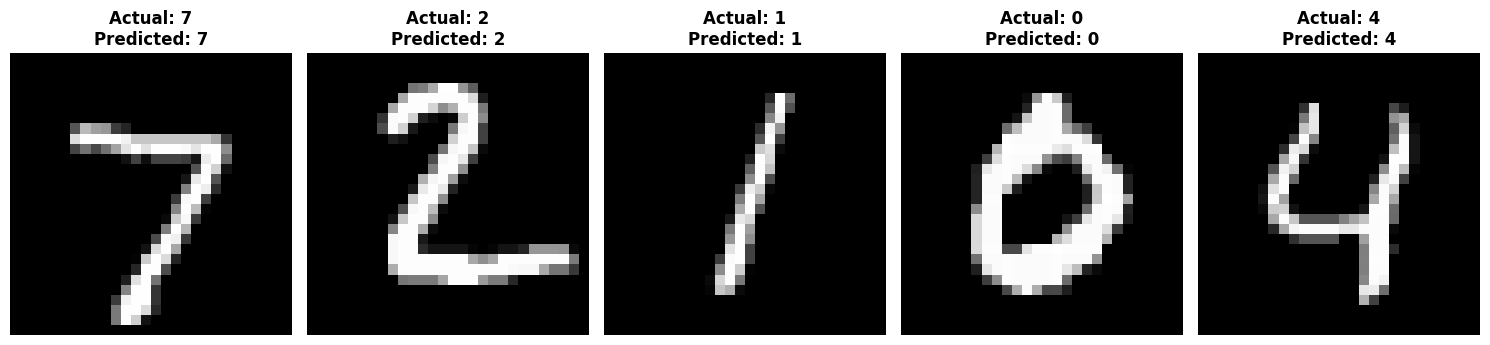

In [18]:
plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {y_test[i]}\nPredicted: {y_pred[i]}", fontsize=12, fontweight='bold')
    plt.axis('off')
plt.tight_layout()
plt.show()